In [2]:
# Import libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [3]:
#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "your key"
consumer_secret = "your key"
access_token = "your key"
access_token_secret = "your key"

#authenticate the API.
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:

# Lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [5]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [7]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Datsa Science"]
get_tweets(Topic , Count=100)

In [8]:
df.head(8)

Date                   User  ... RT           User_location
0  2021-11-03 00:11:54            Joe Herbert  ...  0            Bay Area, CA
1  2021-11-03 00:11:51  Michael Cook (he/him)  ...  0                        
2  2021-11-03 00:11:47        Therefore I am.  ...  0                        
3  2021-11-03 00:11:41           K. Mehrabian  ...  0       Oklahoma City, OK
4  2021-11-03 00:11:41              👁お化けReyu👁  ...  0             Ontario, CA
5  2021-11-03 00:11:41              Ron Baker  ...  0           Michigan, USA
6  2021-11-03 00:11:34      Chareth Cutestory  ...  0         Kansas City, MO
7  2021-11-03 00:11:29                kalia ✨  ...  0  occupied powatan land 

[8 rows x 7 columns]

In [9]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [10]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

Date  ...                                        clean_tweet
0  2021-11-03 00:11:54  ...  these are too much bidet rachel dolezal audito...
1  2021-11-03 00:11:51  ...  i bought one last year but found i overheated ...
2  2021-11-03 00:11:47  ...  this bit has been issued by a computer and is ...
3  2021-11-03 00:11:41  ...  i get the ranking not worried i don t like the...
4  2021-11-03 00:11:41  ...        my computer isn t working i m ending myself

[5 rows x 8 columns]

In [12]:

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

Date  ... Sentiment
0  2021-11-03 00:11:54  ...  Positive
1  2021-11-03 00:11:51  ...  Positive
2  2021-11-03 00:11:47  ...  Negative
3  2021-11-03 00:11:41  ...   Neutral
4  2021-11-03 00:11:41  ...   Neutral

[5 rows x 9 columns]

In [13]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Datsa Science'] are : 101
Total Positive Tweets are : 33
Total Negative Tweets are : 25
Total Neutral Tweets are : 43


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

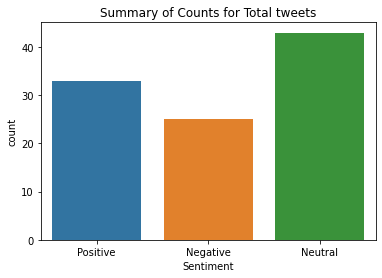

In [14]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

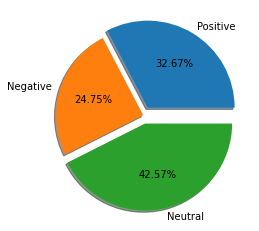

In [15]:
#Pie chart
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

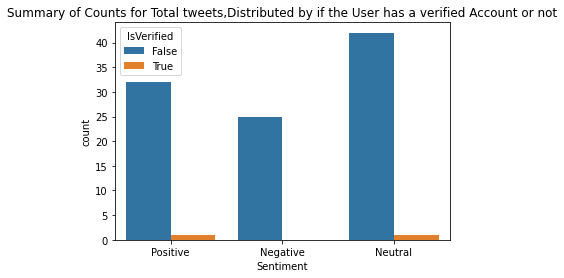

In [16]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")